### Public Transportation Transaction Transjakarta
---
> #### 1. Pendahuluan
>> ##### 1.1 Latar Belakang
>> Transjakarta merupakan sistem transportasi Bus Rapid Transit (BRT) terbesar di Indonesia yang berperan penting dalam mengurangi kemacetan dan meningkatkan mobilitas masyarakat. Dengan tingginya volume penumpang setiap harinya, diperlukan pemahaman mendalam mengenai pola perjalanan dan perilaku penumpang untuk mengoptimalkan layanan, meningkatkan efisiensi operasional, serta meningkatkan kepuasan pelanggan.
>> Data transaksi penumpang Transjakarta memberikan peluang untuk meningkatkan efisiensi layanan, penting untuk memahami pola perjalanan pengguna, termasuk jam sibuk (rush hour), rute yang paling banyak digunakan, serta durasi perjalanan rata-rata. Analisis ini dapat membantu dalam optimalisasi rute, pengurangan kemacetan, dan peningkatan layanan. Oleh karena itu, studi berbasis data sangat diperlukan untuk mendukung pengambilan keputusan strategis.
>
>> ##### 1.2 Tujuan Analisis
>> - Menentukan jam sibuk (rush hour) untuk membantu alokasi armada secara lebih efisien.
>>
>> - Mengidentifikasi halte dan rute yang paling padat untuk mengoptimalkan kapasitas bus dan infrastruktur.
>>
>> ##### 1.3 Alasan Pemilihan Analisis
>> Dalam menentukan analisis yang dilakukan, saya mempertimbangkan faktor dampak dan nilai strategis bagi operasional Transjakarta. Berikut adalah alasan utama mengapa analisis pola perjalanan dipilih:
>>
>>> **1. 3.1 Berdampak langsung pada efisiensi operasional**
>>>  - Memahami waktu dan lokasi kepadatan penumpang memungkinkan penyesuaian frekuensi bus untuk mengurangi waktu tunggu dan kepadatan di dalam bus.
>>>
>>>  - Identifikasi rute dengan beban tinggi dapat membantu dalam perencanaan jalur tambahan atau perubahan jadwal layanan.
>>
>>> **1. 3.2 Memiliki nilai strategis dalam perencanaan jangka panjang**
>>  - Data ini dapat digunakan sebagai dasar untuk pengembangan infrastruktur, seperti penambahan halte atau perubahan rute berdasarkan kebutuhan penumpang.
>>
>>  - Evaluasi durasi perjalanan dapat menjadi dasar untuk optimasi waktu tempuh dan manajemen lalu lintas.
>>
>>> **1. 3.3 Relevan bagi peningkatan pengalaman penumpang**
>>  - Dengan mengetahui pola perjalanan dan demografi penumpang, layanan dapat disesuaikan untuk meningkatkan kenyamanan, seperti ketersediaan kursi bagi lansia atau rute yang lebih efisien bagi pekerja.
>>
>>  - Identifikasi titik-titik kepadatan dapat membantu penyediaan alternatif perjalanan atau sistem informasi yang lebih baik bagi penumpang.
>>
>>> **1. 3.4 Dukungan terhadap kebijakan tarif dan subsidi**
>>  - Data perjalanan dapat membantu dalam evaluasi kebijakan tarif berbasis jarak atau subsidi untuk kelompok tertentu.
>>
>>  - Pemahaman mengenai pola perjalanan dapat membantu dalam menentukan harga yang lebih adil bagi berbagai segmen pengguna.
>
>> ##### 1.4 Metode Analisis
>> Analisis dilakukan dalam beberapa tahap utama:
>> - Eksplorasi Data Awal (EDA)
>>
>> - Cleaning Data
>>
>> - Analisis Data
>>
>> - Penyusunan Insight dan Rekomendasi
>
> Dengan pendekatan ini, analisis yang dilakukan dapat memberikan wawasan yang bermanfaat dalam optimalisasi layanan Transjakarta, meningkatkan efisiensi operasional, serta mendukung pengambilan keputusan berbasis data untuk kebijakan transportasi perkotaan.

> #### 2. Data Understanding
>> ##### 2.1 Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

>> Berikut adalah deskripsi terkait informasi mengenai deskripsi kolom 
>>
>> **Dataset Transjakarta.csv** berisi data transaksi perjalanan penumpang Transjakarta, mencakup informasi seperti kartu pembayaran, rute perjalanan, lokasi tap-in dan tap-out, serta jumlah yang dibayarkan. Data ini dapat digunakan untuk menganalisis pola perjalanan, preferensi pelanggan, dan efisiensi operasional Transjakarta.  
>>  
>> | **Kolom**            | **Deskripsi**  |  
>> |----------------------|---------------|  
>> | **transID**         | ID transaksi unik untuk setiap perjalanan. |  
>> | **payCardID**       | Identitas utama pelanggan berdasarkan kartu yang digunakan untuk masuk dan keluar. |  
>> | **payCardBank**     | Nama bank penerbit kartu pelanggan. |  
>> | **payCardName**     | Nama pelanggan yang tertera di kartu. |  
>> | **payCardSex**      | Jenis kelamin pelanggan yang tertera di kartu. |  
>> | **payCardBirthDate** | Tahun lahir pelanggan. |  
>> | **corridorID**      | ID koridor/rute sebagai kunci untuk pengelompokan rute. |  
>> | **corridorName**    | Nama koridor/rute yang mencantumkan titik awal dan akhir perjalanan. |  
>> | **direction**       | Arah perjalanan yaitu, 0 untuk Pergi dan 1 untuk Pulang. |  
>> | **tapInStops**      | ID halte tempat pelanggan melakukan tap-in (masuk). |  
>> | **tapInStopsName**  | Nama halte tempat pelanggan melakukan tap-in. |  
>> | **tapInStopsLat**   | Garis lintang (latitude) halte tempat tap-in. |  
>> | **tapInStopsLon**   | Garis bujur (longitude) halte tempat tap-in. |  
>> | **stopStartSeq**    | Urutan halte dalam perjalanan (misalnya halte pertama, halte kedua, dst.), tergantung arah perjalanan. |  
>> | **tapInTime**       | Waktu pelanggan melakukan tap-in (tanggal dan jam). |  
>> | **tapOutStops**     | ID halte tempat pelanggan melakukan tap-out (keluar). |  
>> | **tapOutStopsName** | Nama halte tempat pelanggan melakukan tap-out. |  
>> | **tapOutStopsLat**  | Garis lintang (latitude) halte tempat tap-out. |  
>> | **tapOutStopsLon**  | Garis bujur (longitude) halte tempat tap-out. |  
>> | **stopEndSeq**      | Urutan halte terakhir dalam perjalanan, tergantung arah perjalanan. |  
>> | **tapOutTime**      | Waktu pelanggan melakukan tap-out (tanggal dan jam). |  
>> | **payAmount**       | Jumlah biaya yang dibayarkan pelanggan (beberapa perjalanan mungkin gratis). |  
>>  
>> **Kegunaan Dataset**:  
>> Dataset ini dapat digunakan untuk menganalisis pola perjalanan pelanggan, mengidentifikasi pola penggunaan Transjakarta, serta mengevaluasi performa rute tertentu.

>> ##### 2.2 Understanding Awal: 
>> Mari kita lihat 5 baris teratas dan terakhir dari dataset.

In [3]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())
pd.set_option('display.max_columns', None)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [4]:
print(f'Shape:\n{df.shape}')
print("\nInfo:")
df.info()

Shape:
(37900, 22)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsNam

>> ##### Ukuran dan Struktur Dataset
>> - Dataset terdiri dari **37.900 baris** dan **22 kolom fitur**
>> - Kolom waktu (tapInTime, tapOutTime) masih bertipe object → harus diparse ke datetime
>> - Ada beberapa kolom dengan nilai kosong (null)
 

In [5]:
display("Kolom Numerikal:", df.describe(), "Kolom Kategorikal:", df.describe(include='object'))

'Kolom Numerikal:'

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


'Kolom Kategorikal:'

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


>> ##### Kolom Numerikal
>>
>> - **`payAmount`** memiliki nilai minimum 0 dan maksimum 20.000. Nilai rata-rata berada di 2.699, namun median (50%) berada di 3.500, menunjukkan distribusi yang tidak simetris. Banyak penumpang membayar Rp0 (mungkin karena gratis/subsidi), sementara sebagian kecil membayar jauh lebih tinggi dari rata-rata (indikasi outlier).
>> - **`stopStartSeq`** dan **`stopEndSeq`** menunjukkan sebaran urutan halte yang cukup luas (0 hingga 68 dan 1 hingga 77). Sebaran ini terlihat wajar, namun perlu dicek lebih lanjut apakah arah perjalanan (`direction`) konsisten dengan urutan start dan end halte.
>> - **`payCardBirthDate`** menunjukkan tahun lahir berkisar antara 1946 hingga 2012. Artinya, data mencakup pengguna dari berbagai usia, dari remaja hingga lansia.
>> - **`direction`** memiliki nilai 0 dan 1 secara seimbang (mean mendekati 0.5), menandakan bahwa data mencakup perjalanan pergi dan pulang secara proporsional.

>> ##### Kolom Kategorikal
>>
>> - **`payCardBank`** hanya memiliki 6 kategori (contoh: `emoney`, `dki`, `flazz`) dan tidak terlalu timpang distribusinya.
>> - **`payCardSex`** terdiri dari dua kategori: `M` dan `F`, dan keduanya tercatat dengan baik tanpa anomali.
>> - **`corridorID`**, **`tapInStops`**, dan **`tapOutStops`** memiliki ratusan hingga ribuan nilai unik. Ini menunjukkan bahwa analisis pada kolom ini perlu pendekatan agregasi (misalnya berdasarkan koridor utama atau wilayah) agar lebih bermakna.
>> - Beberapa kolom seperti `tapInStopsName` dan `tapOutStopsName` memiliki nilai unik yang tinggi, menunjukkan tingginya variasi lokasi tap-in dan tap-out oleh pengguna.
>> - Tidak ditemukan nilai aneh atau typo pada kolom kategorikal utama. Format dan jumlah kategori terlihat wajar untuk data operasional transportasi publik.


> #### 3. Data Cleaning
>> ##### 3.0 Checklist Data Cleaning
>>
>> Sebelum memulai proses pembersihan data, berikut adalah daftar aspek yang akan dicek dan dibersihkan selama tahap data cleaning:
>
| Aspek                             | Status | Keterangan singkat                                  |
|----------------------------------|--------|-----------------------------------------------------|
| Missing values (5 kolom utama)   | ⏳     | Akan dihapus jika menghambat analisis              |
| Mapping `corridorName`           | ⏳     | Akan diisi berdasarkan `corridorID`                |
| Duplikat baris                   | ⏳     | Akan dicek apakah ada baris identik                |
| Duplikat logis                   | ⏳     | Akan dicek berdasarkan kombinasi kolom logis       |
| Format & tipe data               | ⏳     | Akan dikonversi (`datetime`, `string`)             |
| Validasi urutan waktu            | ⏳     | Pastikan `tapOutTime` lebih besar dari `tapInTime` |
| Validasi urutan halte vs arah    | ⏳     | Cek `stopStartSeq` dan `stopEndSeq` vs `direction` |


>#
>> ##### 3.1 Duplicated Data

In [6]:
print("Jumlah baris duplikat:", df.duplicated().sum())
print("\nJumlah nilai unik per kolom:\n", df.nunique())


Jumlah baris duplikat: 0

Jumlah nilai unik per kolom:
 transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64


In [7]:
logical_cols = ['payCardID', 'tapInTime', 'tapInStops', 'tapOutStops', 'direction']
duplikat_logis = df[df.duplicated(subset=logical_cols, keep=False)]
duplikat_logis.shape[0]
print("Jumlah baris duplikat berdasarkan logical test:", duplikat_logis.shape[0])

if duplikat_logis.shape[0] < 1:
    print("Semua data dari dataset sudah bersih duplikasi data.")
else:
    print(f"Terdapat {duplikat_logis.shape[0]} baris duplikat berdasarkan logical test.")


Jumlah baris duplikat berdasarkan logical test: 0
Semua data dari dataset sudah bersih duplikasi data.


>> ##### 3.2 Missing Values

In [8]:
# Hitung jumlah missing values per kolom
missing_counts = df.isnull().sum()

# Ambil hanya kolom yang memiliki missing values
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Hitung persentase missing values per kolom
missing_percent = (missing_cols / len(df)) * 100

# Gabungkan jadi satu DataFrame ringkasan
missing_df = pd.DataFrame({
    'Missing Values': missing_cols,
    'Percentage (%)': missing_percent.round(2)
})

# Tampilkan ringkasan
missing_df

,Missing Values,Percentage (%)
tapOutStops,2289,6.04
corridorName,1930,5.09
tapOutStopsName,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsLon,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
corridorID,1257,3.32
tapInStops,1213,3.20
payAmount,1007,2.66


>>> ##### 3.2.1 Strategi Penanganan Missing Values
>>>
>>> Berdasarkan tujuan analisis yang difokuskan pada:
>>>
>>> **- Menentukan jam sibuk**  
>>> **- Mengidentifikasi halte dan rute paling padat**  
>>>
>>> Maka, penanganan data kosong (missing values) dilakukan secara selektif dan kontekstual. Berikut strategi untuk setiap kolom yang mengandung nilai kosong:
>>>
>>> **`tapOutStops`** (6.04% missing):  
>>> - Kolom ini sangat penting untuk menghitung durasi dan rute perjalanan.  
>>> - Baris dengan nilai kosong akan **dihapus** untuk analisis rute dan durasi.  
>>> - Masih bisa digunakan untuk analisis **jam sibuk (tap-in only)**.

>>> **`tapOutTime`** (3.55% missing):  
>>> - Diperlukan untuk menghitung durasi perjalanan.  
>>> - Baris dengan nilai kosong akan **dihapus** untuk analisis efisiensi waktu.

>>> **`stopEndSeq`** (3.55% missing):  
>>> - Ini adalah urutan halte tujuan.  
>>> - Sangat penting untuk validasi logika urutan perjalanan dan jarak antar halte.  
>>> - Baris akan **dihapus** jika digunakan untuk analisis efisiensi rute atau jarak tempuh.

>>> **`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`** (3.55% missing):  
>>> - Bergantung pada `tapOutStops`.  
>>> - Jika `tapOutStops` kosong, maka nilai-nilai ini juga kosong.  
>>> - Perlakuan mengikuti `tapOutStops`: **hapus** jika analisis butuh lokasi, **biarkan** jika hanya fokus tap-in.

>>> **`corridorName`** (5.09% missing):  
>>> - Diperlukan untuk identifikasi rute dan koridor sibuk.  
>>> - Akan diisi ulang jika `corridorID` tersedia (melalui mapping).  
>>> - Jika tidak, baris dapat dihapus.

>>> **`corridorID`** (3.32% missing):  
>>> - Kolom kunci untuk pengelompokan rute.  
>>> - Jika kosong, tidak bisa ditentukan jalur → baris akan **dihapus** untuk analisis rute.

>>> **`tapInStops`** (3.20% missing):  
>>> - Titik awal perjalanan, **sangat penting** untuk semua jenis analisis.  
>>> - Baris dengan nilai kosong akan **dihapus**.

>>> **`payAmount`** (2.66% missing):  
>>> - Tidak krusial untuk analisis utama, tapi tetap berguna untuk analisis tambahan (misalnya perilaku penumpang).  
>>> - Nilai kosong bisa **dibiarkan**, atau diisi dengan 0 jika dianggap perjalanan gratis (opsional).

>>> **Kesimpulan Strategi Cleaning:**  
>>> **Hapus baris** jika: missing di `tapInStops`, `tapOutStops`, `tapOutTime`, `stopEndSeq`, `corridorID`  
>>> **Mapping** `corridorName` dari `corridorID` (jika memungkinkan)  
>>> **Biarkan kosong** jika: hanya menganalisis tap-in / jam sibuk, dan kolom tidak berpengaruh langsung  
>>>
>>> Cleaning dilakukan selektif berdasarkan kebutuhan analisis, agar tidak membuang data penting secara sia-sia.


In [9]:
# 1. Salin dataframe agar data asli tetap aman
df_cleaned = df.copy()

print("Jumlah baris sebelum cleaning:", df_cleaned.shape[0])

# 2. Hapus baris yang memiliki nilai kosong pada kolom penting untuk analisis rute dan durasi
# Kolom yang dicek: tapInStops, tapOutStops, tapOutTime, stopEndSeq, corridorID
df_cleaned = df_cleaned.dropna(subset=[
    'tapInStops',
    'tapOutStops',
    'tapOutTime',
    'stopEndSeq',
    'corridorID'
])

# 3. (Opsional) Lihat bentuk data setelah dibersihkan
print("Jumlah baris setelah cleaning:", df_cleaned.shape[0])


Jumlah baris sebelum cleaning: 37900
Jumlah baris setelah cleaning: 33325


In [10]:
# Hitung jumlah missing values per kolom pada df_cleaned
missing_counts_cleaned = df_cleaned.isnull().sum()

# Ambil hanya kolom yang masih memiliki missing values
missing_cols_cleaned = missing_counts_cleaned[missing_counts_cleaned > 0].sort_values(ascending=False)

# Hitung persentase missing values per kolom
missing_percent_cleaned = (missing_cols_cleaned / len(df_cleaned)) * 100

# Gabungkan jadi DataFrame ringkasan
missing_df_cleaned = pd.DataFrame({
    'Missing Values': missing_cols_cleaned,
    'Percentage (%)': missing_percent_cleaned.round(2)
})

# Tampilkan hasil
missing_df_cleaned


,Missing Values,Percentage (%)
payAmount,885,2.66
corridorName,730,2.19


>> ##### 3.3 Mapping 'corridorName'

In [11]:
# 1. Ambil pasangan unik corridorID dan corridorName dari data yang sudah lengkap
corridor_mapping = df_cleaned[['corridorID', 'corridorName']].dropna().drop_duplicates()

# 2. Buat dictionary untuk mapping
corridor_dict = dict(zip(corridor_mapping['corridorID'], corridor_mapping['corridorName']))

# 3. Hitung jumlah nilai kosong sebelum pengisian
before_fillna = df_cleaned['corridorName'].isnull().sum()

# 4. Isi nilai kosong dengan mapping dari corridorID
df_cleaned['corridorName'] = df_cleaned['corridorName'].fillna(df_cleaned['corridorID'].map(corridor_dict))

# 5. Hitung jumlah nilai kosong setelah pengisian
after_fillna = df_cleaned['corridorName'].isnull().sum()

# 6. Hitung berapa banyak nilai yang berhasil diisi
filled_count = before_fillna - after_fillna

# 7. Tampilkan hasil
print("Jumlah missing values pada corridorName sebelum pengisian:", before_fillna)
print("Jumlah missing values pada corridorName setelah pengisian:", after_fillna)
print("Jumlah missing values yang berhasil diisi:", filled_count)


Jumlah missing values pada corridorName sebelum pengisian: 730
Jumlah missing values pada corridorName setelah pengisian: 0
Jumlah missing values yang berhasil diisi: 730


>> ##### 3.3 Konversi kolom yang memiliki value berupa datetime

In [12]:
# 1. Konversi kolom waktu ke datetime
df_cleaned['tapInTime'] = pd.to_datetime(df_cleaned['tapInTime'], errors='coerce')
df_cleaned['tapOutTime'] = pd.to_datetime(df_cleaned['tapOutTime'], errors='coerce')

# 2. Konversi kolom ID ke string
df_cleaned['payCardID'] = df_cleaned['payCardID'].astype(str)

# 3. Konversi kolom tahun lahir ke datetime (format: tahun saja)
df_cleaned['payCardBirthDate'] = pd.to_datetime(df_cleaned['payCardBirthDate'], format='%Y', errors='coerce')

# Cek hasil akhir tipe data
df_cleaned.dtypes


transID                     object
payCardID                   object
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate    datetime64[ns]
corridorID                  object
corridorName                object
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
dtype: object

>> ##### 3.3.1 Validasi Ulang Kolom Datetime Setelah Konversi

>> Setelah melakukan konversi tipe data ke `datetime` menggunakan `errors='coerce'`, saya melakukan pengecekan ulang terhadap kolom `tapInTime`, `tapOutTime`, dan `payCardBirthDate` untuk memastikan tidak muncul nilai `NaT` sebagai hasil dari konversi gagal.






In [13]:
df_cleaned[['tapInTime', 'tapOutTime','payCardBirthDate']].isna().sum()


tapInTime           0
tapOutTime          0
payCardBirthDate    0
dtype: int64

>> ✅ Hasil menunjukkan tidak ada nilai `NaT` tambahan, sehingga data dinyatakan aman untuk digunakan dalam analisis waktu.

>> ##### 3.3 Validasi Urutan Waktu
>> Saya melakukan validasi untuk memastikan bahwa waktu tap-out (`tapOutTime`) selalu terjadi setelah tap-in (`tapInTime`), karena secara logika penumpang tidak mungkin keluar sebelum masuk.

>> Validasi dilakukan dengan memfilter baris di mana `tapOutTime < tapInTime`.




In [14]:
# Cari baris di mana tapOutTime lebih awal dari tapInTime
invalid_time = df_cleaned[df_cleaned['tapOutTime'] < df_cleaned['tapInTime']]

# Tampilkan jumlah dan contoh datanya
print("Jumlah baris dengan tapOutTime < tapInTime:", invalid_time.shape[0])
invalid_time.head()


Jumlah baris dengan tapOutTime < tapInTime: 0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


>> ✅ Hasilnya: Tidak ditemukan baris yang melanggar logika tersebut, sehingga data dinyatakan valid secara kronologis.

>> ##### 3.4 Validasi Urutan Halte berdasarkan `stopStartSeq` dan `stopEndSeq`

>> Untuk memastikan bahwa perjalanan tercatat secara logis, saya melakukan validasi terhadap urutan halte.

>> Saya ingin memastikan apakah dalam satu perjalanan sistem Transjakarta menetapkan bahwa:
>> - `stopEndSeq` harus **lebih besar** dari `stopStartSeq`

>> Oleh karena itu, saya memfilter baris di mana `stopEndSeq <= stopStartSeq`, karena hal tersebut dianggap tidak logis dalam konteks penomoran urutan halte yang konsisten menaik untuk setiap arah.


In [15]:
# Baris yang tidak urut berdasarkan start&end seq
invalid_direction = df_cleaned[df_cleaned['stopEndSeq'] <= df_cleaned['stopStartSeq']]

# Jumlah baris yang tidak urut secara logika arah
print("Jumlah baris dengan urutan halte tidak sesuai arah:", invalid_direction.shape[0])

# Contoh data anomali
invalid_direction.head()


Jumlah baris dengan urutan halte tidak sesuai arah: 0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [16]:
# Filter hanya koridor 5 dan direction = 0
df_corridor5_dir0 = df_cleaned[
    (df_cleaned['corridorID'] == '5') & (df_cleaned['direction'] == 0)
]

# Ambil nama halte tap-in dan urutannya
tapin = df_corridor5_dir0[['tapInStopsName', 'stopStartSeq']].dropna()

# Hilangkan duplikat nama halte, urutkan berdasarkan sequence
tapin_unique = tapin.drop_duplicates(subset='tapInStopsName').sort_values('stopStartSeq').reset_index(drop=True)

# Tampilkan
tapin_unique.rename(columns={
    'tapInStopsName': 'stopName',
    'stopStartSeq': 'startSeq'
})


,stopName,startSeq
0,Slamet Riyadi,1
1,Matraman 1,3
2,Salemba Carolus,4
3,Pal Putih,7
4,Budi Utomo,9
5,Pasar Baru Timur,10
6,Jembatan Merah,11
7,Gunung Sahari Mangga Dua,12
8,Pademangan,13


In [17]:
# Filter data hanya untuk koridor 5
df_corridor5 = df_cleaned[df_cleaned['corridorID'] == '5']

# Ambil data direction = 0 (arah Matraman → Ancol)
tapin_0 = df_corridor5[df_corridor5['direction'] == 0][['tapInStopsName', 'stopStartSeq']].dropna()
tapin_0 = tapin_0.drop_duplicates(subset='tapInStopsName').sort_values('stopStartSeq').reset_index(drop=True)
tapin_0.columns = ['stopName_dir0', 'startSeq_dir0']

# Ambil data direction = 1 (arah Ancol → Matraman)
tapin_1 = df_corridor5[df_corridor5['direction'] == 1][['tapInStopsName', 'stopStartSeq']].dropna()
tapin_1 = tapin_1.drop_duplicates(subset='tapInStopsName').sort_values('stopStartSeq').reset_index(drop=True)
tapin_1.columns = ['stopName_dir1', 'startSeq_dir1']

# Gabungkan data dari kedua arah untuk dibandingkan berdampingan
side_by_side = pd.concat([tapin_0, tapin_1], axis=1)

# Tampilkan hasil
side_by_side


,stopName_dir0,startSeq_dir0,stopName_dir1,startSeq_dir1
0,Slamet Riyadi,1.0,Ancol,0
1,Matraman 1,3.0,Pademangan,1
2,Salemba Carolus,4.0,Budi Utomo,5
3,Pal Putih,7.0,Senen Sentral,6
4,Budi Utomo,9.0,Pal Putih,7
5,Pasar Baru Timur,10.0,Kramat Sentiong,8
6,Jembatan Merah,11.0,Matraman 1,11
7,Gunung Sahari Mangga Dua,12.0,Tegalan,12
8,Pademangan,13.0,Slamet Riyadi,13
9,NaN,NaN,Matraman Baru,14


>> ##### 3.4.1 Koreksi Pemahaman terhadap `stopStartSeq` dan `stopEndSeq`

>> Pada awal proses validasi data, saya sempat mengidentifikasi potensi anomali dalam urutan halte berdasarkan kolom `stopStartSeq` dan `stopEndSeq`.

>> Saya menduga bahwa terdapat banyak baris di mana `stopEndSeq` tidak lebih besar dari `stopStartSeq`, sehingga secara logika arah perjalanan tampak tidak valid.

>> Namun, setelah dilakukan pengecekan lebih dalam, saya menemukan bahwa:

>> - Setiap halte memiliki **dua versi urutan** (`stopSeq`), tergantung dari arah perjalanan (`direction`)
>> - Dengan kata lain, halte yang sama bisa memiliki nomor urutan berbeda pada `direction = 0` dan `direction = 1`
>> - Sistem Transjakarta menetapkan **urutan halte selalu menaik** dalam satu perjalanan, tidak peduli arahnya

>> ✅ Dengan pemahaman tersebut, saya mengoreksi logika validasi menjadi:
>> ```python
>> df_cleaned['stopEndSeq'] <= df_cleaned['stopStartSeq']
>> ```

>> ✅ Hasilnya, tidak ditemukan baris yang melanggar logika ini setelah filter dilakukan.  
>> Maka, **data dinyatakan bersih dari baris yang tidak urut berdasarkan `stopStartSeq` dan `stopEndSeq`**.

>> Kesalahan asumsi ini memberikan pelajaran penting bahwa validasi teknis harus mempertimbangkan konteks bisnis dan struktur sistem data.


>> #### 3.5 Penutup Tahap Data Cleaning

>> Setelah melalui serangkaian tahapan cleaning yang terstruktur, seluruh aspek yang berpengaruh langsung terhadap fokus analisis telah berhasil dibersihkan dan divalidasi.

>> Tabel berikut menunjukkan progres cleaning yang telah diselesaikan berdasarkan checklist awal:

| Aspek                             | Status | Keterangan singkat                                  |
|----------------------------------|--------|-----------------------------------------------------|
| Missing values (5 kolom utama)   | ✅     | Sudah dibersihkan, kolom yang krusial di-drop       |
| Mapping `corridorName`           | ✅     | Sudah dilakukan berdasarkan `corridorID`            |
| Duplikat baris                   | ✅     | Tidak ditemukan duplikat identik                    |
| Duplikat logis                   | ✅     | Tidak ditemukan duplikat logis berdasarkan 5 kolom  |
| Format & tipe data               | ✅     | Sudah dikonversi ke `datetime`, `string` sesuai kebutuhan |
| Validasi urutan waktu            | ✅     | Sudah dicek dan valid (`tapOutTime > tapInTime`)    |
| Validasi urutan halte vs arah    | ✅     | Sudah dikonfirmasi, tidak ada anomali berdasarkan sistem urutan direction |
> #
>> Dengan demikian, dataset dapat dinyatakan siap untuk memasuki tahap eksplorasi data (EDA) dan analisis lebih lanjut, sesuai dengan tujuan proyek:
>> - Menentukan jam sibuk  
>> - Mengidentifikasi halte dan rute paling padat  
>> - Menghitung durasi perjalanan rata-rata


> #### 4.0 Exploratory Data Analysis (EDA)

>> Setelah memastikan bahwa data bersih dan valid, tahap selanjutnya adalah melakukan Exploratory Data Analysis (EDA) untuk menggali informasi penting dari dataset sebelum dilakukan analisis mendalam.
>>
>> Fokus EDA ini disesuaikan dengan tiga tujuan utama proyek:
>>
>> 1. **Menentukan jam sibuk (rush hour)**  
>>    Untuk mengetahui waktu-waktu paling padat digunakan, yang dapat digunakan sebagai dasar pengalokasian armada.
>>
>> 2. **Mengidentifikasi halte dan rute paling padat**  
>>    Untuk mengetahui lokasi dan rute yang memiliki volume penumpang tinggi agar dapat dilakukan optimalisasi infrastruktur dan layanan.
>>
>> 3. **Menghitung durasi perjalanan rata-rata**  
>>    Untuk menilai efisiensi perjalanan dan potensi perbaikan waktu tempuh antar halte.
>>
>> EDA akan dilakukan secara bertahap dan fokus pada pola, tren, dan distribusi yang relevan dengan masing-masing tujuan tersebut.


>> ##### 4.1 Menentukan Jam Sibuk (Rush Hour)

>> Analisis ini bertujuan untuk mengetahui waktu-waktu tersibuk penumpang melakukan tap-in di sistem Transjakarta.

>> Informasi ini sangat penting untuk mendukung pengambilan keputusan operasional, seperti pengalokasian armada, penambahan jadwal, atau pengaturan lalu lintas koridor.

>> Langkah-langkah yang dilakukan:
>> - Mengekstrak jam dan hari dari kolom `tapInTime`
>> - Menghitung jumlah transaksi tap-in per jam
>> - Menghitung distribusi tap-in per hari dalam seminggu
>> - Menyusun tabel ringkasan untuk mengidentifikasi pola jam sibuk



In [18]:
# Salin data hasil cleaning ke df_eda
df_eda = df_cleaned.copy()

# Feature Engineering: ekstrak waktu
df_eda['hour'] = df_eda['tapInTime'].dt.hour
df_eda['weekday'] = df_eda['tapInTime'].dt.day_name()
df_eda['date'] = df_eda['tapInTime'].dt.date

#konversi dtype 'date' ke datetime
df_eda['date'] = pd.to_datetime(df_eda['date'], errors='coerce')
df_eda['hour'] = df_eda['tapInTime'].dt.hour.astype(int)

# Hitung jumlah tap-in per jam (0–23)
tapin_per_hour = df_eda['hour'].value_counts().sort_index()

# Hitung jumlah tap-in per hari dalam seminggu (diurutkan)
tapin_per_weekday = df_eda['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


In [19]:
# Tabel 1: Tap-in per jam
tapin_per_hour_df = tapin_per_hour.reset_index()
tapin_per_hour_df.columns = ['Hour', 'Tap-in Count']

# Tabel 2: Tap-in per hari
tapin_per_weekday_df = tapin_per_weekday.reset_index()
tapin_per_weekday_df.columns = ['Weekday', 'Tap-in Count']




>> ##### 4.1.1 Distribusi Tap-in per Jam
>>
>> Analisis ini dilakukan untuk mengetahui jam berapa transaksi tap-in paling banyak dilakukan oleh penumpang Transjakarta.
>>
>> Data dianalisis berdasarkan kolom `hour` yang dihasilkan dari `tapInTime`. Hasilnya menunjukkan distribusi aktivitas penumpang dalam satu hari penuh (jam 0–23).


In [20]:
df_eda['hour'].value_counts().sort_index()

hour
5     2940
6     5106
7     2451
8     2530
9     2514
10     267
11     301
12     296
13     317
14     154
15     347
16    2949
17    4838
18    2124
19    2161
20    2131
21    1899
Name: count, dtype: int64

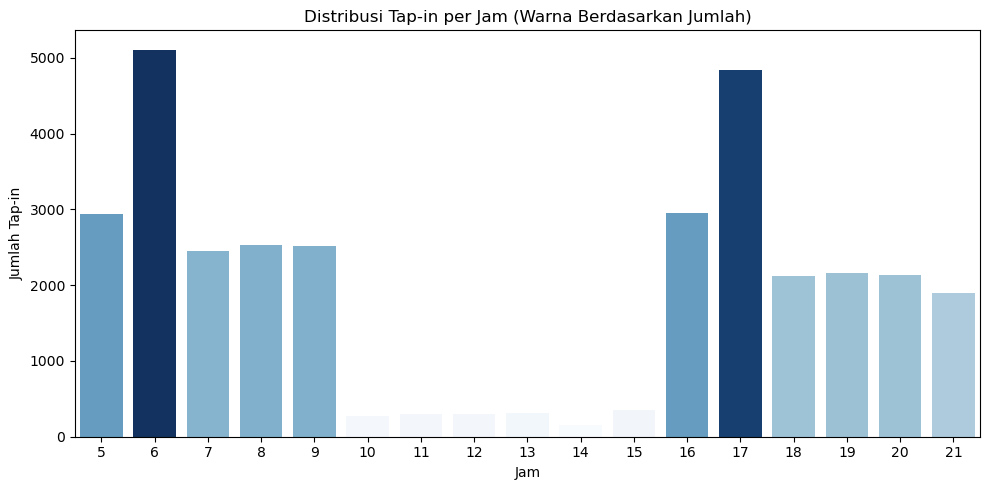

In [21]:

# Normalisasi dan konversi warna ke list
norm = plt.Normalize(tapin_per_hour_df['Tap-in Count'].min(), tapin_per_hour_df['Tap-in Count'].max())
colors = plt.cm.Blues(norm(tapin_per_hour_df['Tap-in Count'])).tolist()

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Hour',
    y='Tap-in Count',
    hue='Hour',             
    data=tapin_per_hour_df,
    palette=colors,
    legend=False            
)

plt.title('Distribusi Tap-in per Jam (Warna Berdasarkan Jumlah)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Tap-in')
plt.tight_layout()
plt.show()



>> **Insight:**
>> - Jam paling sibuk berada pada rentang **pukul 05:00 hingga 09:00** dengan Tap-in paling banyak pada pukul 06:00, yang kemungkinan besar merupakan jam pulang kerja/sekolah.
>> - Lalu terdapat peningkatan kembali pada sore hari sekitar pukul **16:00–21:00** dengan Tap-in paling banyak pada pukul 17:00, yang kemungkinan besar merupakan jam pulang kerja/sekolah.
>> - Aktivitas tap-in paling rendah terjadi pada siang hari (jam 10–15).


>> #### 4.1.2 Distribusi Tap-in per Hari
>>
>> Analisis ini bertujuan untuk mengetahui hari dalam seminggu yang memiliki volume tap-in tertinggi.
>>
>> Data dianalisis dari kolom `weekday` yang diambil dari waktu tap-in pengguna. Hasil ini dapat menunjukkan pola aktivitas antara hari kerja dan akhir pekan.



In [22]:
df_eda['weekday'].value_counts().sort_values(ascending=False)


weekday
Friday       6049
Tuesday      6024
Thursday     6019
Wednesday    6001
Monday       5990
Sunday       1628
Saturday     1614
Name: count, dtype: int64

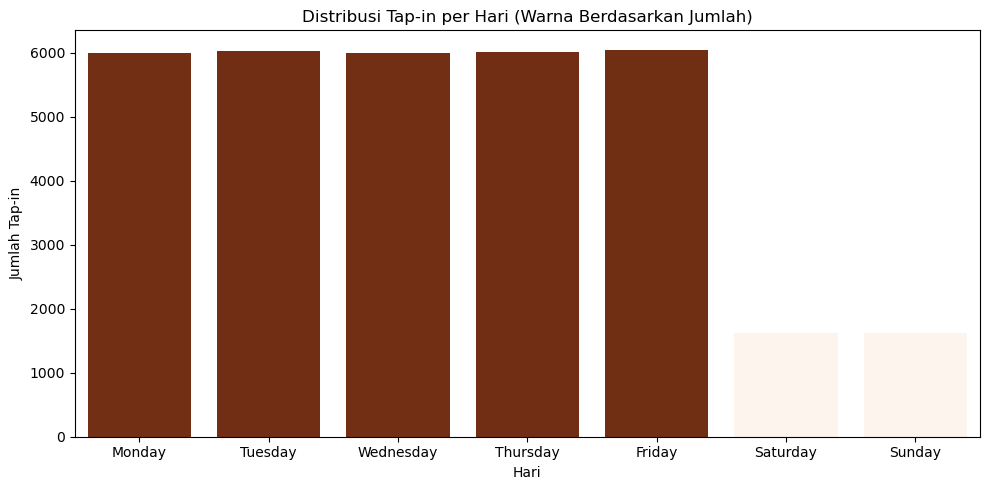

In [23]:

# Pastikan urutan hari sesuai kalender
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tapin_per_weekday_df['Weekday'] = pd.Categorical(tapin_per_weekday_df['Weekday'], categories=ordered_days, ordered=True)
tapin_per_weekday_df = tapin_per_weekday_df.sort_values('Weekday')

# Normalisasi dan buat list warna
norm = plt.Normalize(tapin_per_weekday_df['Tap-in Count'].min(), tapin_per_weekday_df['Tap-in Count'].max())
colors = plt.cm.Oranges(norm(tapin_per_weekday_df['Tap-in Count'])).tolist()

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Weekday',
    y='Tap-in Count',
    hue='Weekday',              # untuk seaborn >=0.14 compliance
    data=tapin_per_weekday_df,
    palette=colors,
    legend=False
)

plt.title('Distribusi Tap-in per Hari (Warna Berdasarkan Jumlah)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tap-in')
plt.tight_layout()
plt.show()



>> **Insight:**
>> - **Senin hingga Jumat** menunjukkan volume yang tinggi secara konsisten.
>> - **Sabtu dan Minggu** memiliki jumlah tap-in jauh lebih rendah, menunjukkan pola penggunaan layanan lebih banyak untuk keperluan kerja dibandingkan rekreasi.

>> #### 4.1.3 Perbandingan Rush Hour: Weekday vs Weekend

>> Untuk memahami perbedaan pola aktivitas penumpang antara hari kerja dan akhir pekan, dilakukan analisis kombinasi antara jam dan hari, yang kemudian dipisahkan menjadi dua visualisasi: weekday (Senin–Jumat) dan weekend (Sabtu–Minggu).

>> Pemisahan ini dilakukan agar masing-masing kelompok dapat divisualisasikan secara proporsional terhadap skala intensitasnya sendiri. Dengan demikian, pola jam sibuk di akhir pekan tetap terlihat jelas meskipun secara absolut volumenya lebih kecil dibanding hari kerja.



In [24]:
df_eda['day_type'] = df_eda['weekday'].apply(
    lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend'
)

weekday_data = df_eda[df_eda['day_type'] == 'Weekday']
weekend_data = df_eda[df_eda['day_type'] == 'Weekend']

# Weekday
pivot_weekday = weekday_data.groupby(['hour', 'weekday']).size().reset_index(name='tapin_count')
pivot_weekday = pivot_weekday.pivot(index='hour', columns='weekday', values='tapin_count')
pivot_weekday = pivot_weekday[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

# Weekend
pivot_weekend = weekend_data.groupby(['hour', 'weekday']).size().reset_index(name='tapin_count')
pivot_weekend = pivot_weekend.pivot(index='hour', columns='weekday', values='tapin_count')
pivot_weekend = pivot_weekend[['Saturday', 'Sunday']]


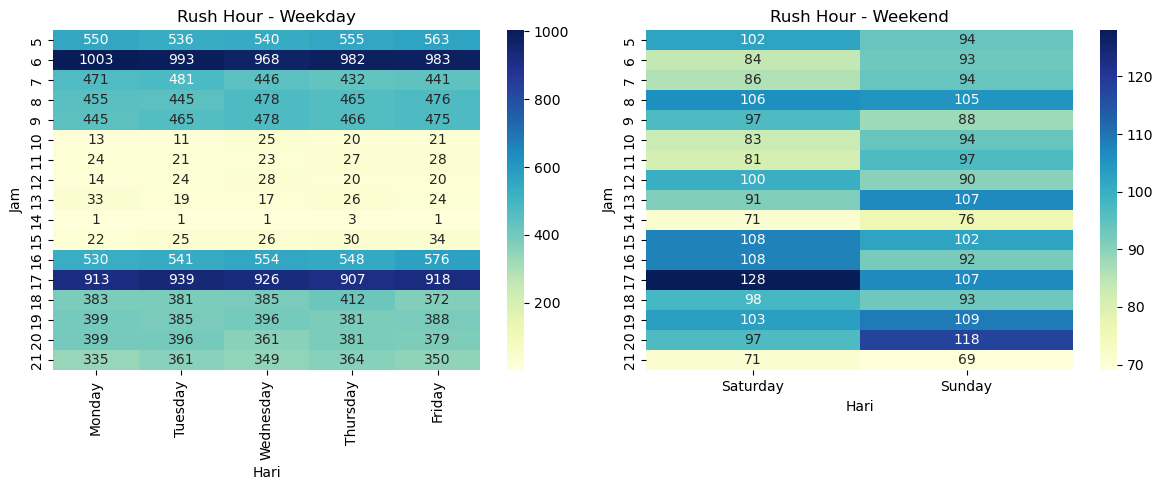

In [25]:
plt.figure(figsize=(12, 5))

# Heatmap Weekday
plt.subplot(1, 2, 1)
sns.heatmap(pivot_weekday, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Rush Hour - Weekday')
plt.xlabel('Hari')
plt.ylabel('Jam')

# Heatmap Weekend
plt.subplot(1, 2, 2)
sns.heatmap(pivot_weekend, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Rush Hour - Weekend')
plt.xlabel('Hari')
plt.ylabel('Jam')

plt.tight_layout()
plt.show()



>> **Insight:**
>> - **Weekday**: Pola tap-in sangat konsisten tinggi pada **jam 05:00 hingga 09:00** dan **jam 16:00 hingga 21:00**, menunjukkan dominasi aktivitas berangkat kerja atau sekolah.
>> - **Weekend**: Pola lebih menyebar dan cenderung meningkat pada pagi dan sore ke malam, mengindikasikan aktivitas rekreasi atau perjalanan keluarga.
>> - Volume akhir pekan memang lebih rendah, namun puncak aktivitasnya tetap terbaca dengan baik saat heatmap dipisahkan.

>> Analisis ini menunjukkan bahwa pengelolaan armada sebaiknya disesuaikan tidak hanya berdasarkan hari, tetapi juga mempertimbangkan **pola waktu spesifik di masing-masing kategori hari**.

>> #### 4.1.4 Rekomendasi Operasional Berdasarkan Analisis Rush Hour

>> Berdasarkan hasil analisis distribusi waktu perjalanan penumpang Transjakarta, berikut beberapa rekomendasi yang dapat dipertimbangkan oleh pihak operasional:

>> 1. **Penambahan Armada di Pagi dan Sore Hari Weekday**
>>    - Aktivitas tap-in paling tinggi terjadi pada **jam 05:00 hingga 09:00** dan **jam 16:00 hingga 21:00** dari **Senin hingga Jumat**.
>>    - Direkomendasikan untuk menambah jumlah bus pada weekday, terutama di jam-jam tersebut yang menunjukkan lonjakan tertinggi.
>>    - Karena jumlah penumpang pada weekday sangat rendah di antara jam **10:00–15:00**, armada yang menganggur pada jam ini sebaiknya **dialihkan ke jadwal sibuk pagi atau sore hari**, frequensi datangnya bus pada jam ini dapat dikurangi.
>>    - Ini membantu efisiensi penggunaan bus, bahan bakar, dan tenaga kerja.


>> 2. **Evaluasi Kebutuhan Armada di Akhir Pekan**
>>    - Meskipun total volume di akhir pekan lebih kecil, **tidak ada jam yang benar-benar sepi**.
>>    - Maka disarankan untuk tetap mempertahankan **jumlah armada yang stabil sepanjang hari** di akhir pekan, alih-alih hanya fokus pagi atau sore.

>> 3. **Penyusunan Jadwal Armada Berdasarkan Pola Harian**
>>    - Alih-alih menyamaratakan jadwal operasional sepanjang minggu, sebaiknya dilakukan penjadwalan dinamis berbasis pola waktu aktual.
>>    - Contohnya: jadwal bus ekstra hanya diaktifkan pada Senin pagi dan Jumat sore (tergantung perkembangan data aktual yang selalu dinamis).

>> 4. **Informasi Publikasi kepada Penumpang**
>>    - Penumpang bisa diinformasikan terkait jam-jam paling sibuk agar mereka dapat mengatur waktu perjalanan untuk menghindari kepadatan.

>> 5. **Integrasi dengan Layanan Pendukung**
>>    - Pada jam sibuk weekday, layanan feeder seperti mikrotrans atau ojek daring bisa diintegrasikan lebih aktif untuk mendukung efisiensi alur penumpang.

>> Dengan mempertimbangkan rekomendasi di atas, diharapkan layanan Transjakarta dapat menjadi lebih efisien, responsif, dan berorientasi pada kebutuhan **aktual** pengguna.


>> #### 4.2 Analisis Halte dan Rute Paling Padat

>> Selain waktu, titik asal dan tujuan perjalanan juga menjadi aspek penting dalam menganalisis perilaku pengguna Transjakarta. Informasi ini dapat dimanfaatkan untuk mengoptimalkan infrastruktur halte, perencanaan trayek, serta pengalokasian armada.

>> Pada tahap ini, dilakukan analisis terhadap:
>> - Halte dengan jumlah tap-in tertinggi
>> - Halte dengan jumlah tap-out tertinggi
>> - Koridor atau rute dengan frekuensi perjalanan tertinggi
>> - (Opsional) Perbandingan volume arah pergi vs pulang per koridor

>> Hasil analisis ini diharapkan mampu memberikan dasar pengambilan keputusan yang lebih tepat dalam hal penguatan fasilitas halte, prioritas trayek, dan peningkatan layanan pada rute-rute dengan permintaan tinggi.


>> #### 4.2.1 Halte Tap-in Paling Ramai

>> Analisis ini bertujuan untuk mengetahui halte mana yang menjadi titik keberangkatan utama penumpang Transjakarta. Kolom yang digunakan adalah `tapInStopsName`, yang menunjukkan lokasi tap-in setiap transaksi.

>> Hasilnya disusun berdasarkan frekuensi tertinggi, dan dapat digunakan untuk mengidentifikasi:
>> - Halte yang berpotensi mengalami penumpukan penumpang
>> - Titik yang membutuhkan fasilitas tambahan (tempat duduk, papan informasi, petugas)
>> - Kandidat halte yang layak mendapat armada tambahan di jam-jam sibuk



>> **Insight:**
>> - Halte **Penjaringan** menempati urutan teratas sebagai titik tap-in terbanyak.
>> - Pola ini menunjukkan bahwa halte terminal ujung rute atau dekat permukiman padat cenderung memiliki frekuensi tap-in tinggi.


In [26]:
# Tambahkan kolom weekday_num untuk urutan Senin–Minggu
weekday_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df_eda['weekday_num'] = df_eda['weekday'].map(weekday_map)

sample_per_day = df_eda.groupby('weekday_num').head(1)
sample_per_day[['weekday', 'weekday_num']].reset_index(drop=True)



,weekday,weekday_num
0,Monday,1
1,Tuesday,2
2,Wednesday,3
3,Thursday,4
4,Friday,5
5,Sunday,7
6,Saturday,6


In [27]:
#feature engineering dan melanjutkan visualisasi dan analisis by tableu

# Ambil semua kolom dari tap-in baris
df_tapin = df_eda.copy()
df_tapin['halte_unik'] = df_tapin['tapInStopsName']
df_tapin['jenis_tap'] = 'Tap-in'

# Ambil semua kolom dari tap-out baris
df_tapout = df_eda.copy()
df_tapout['halte_unik'] = df_tapout['tapOutStopsName']
df_tapout['jenis_tap'] = 'Tap-out'

# Gabungkan keduanya secara vertikal (row-wise)
df_long = pd.concat([df_tapin, df_tapout], ignore_index=True)

# Simpan ke CSV untuk Tableau
df_long.to_csv("df_final.csv", index=False)


<img src="Screenshot 2025-04-17 at 02.23.44.png" width="600">


<img src="top2halte.png" width="600" height="350">


>> Pada visualisasi berikut, ditampilkan dua halte terpadat berdasarkan jumlah tap-in yaitu **Penjaringan** dan **Garuda Taman Mini**. Fokus analisis diarahkan pada **kapan pengguna melakukan tap-in**, untuk menginterpretasikan **arah dominan perjalanan** pada masing-masing halte.
>> 
>> ##### 📌 Insight Per Halte:
>> 
>> - **Penjaringan**: Tap-in tertinggi terjadi pada **sore hari (16:00–17:00)**.  
>>   - Ini mengindikasikan bahwa Penjaringan berfungsi sebagai **titik keberangkatan perjalanan saat arah pulang**.  
>>   - Hal ini didukung oleh posisi geografisnya sebagai titik ujung di wilayah Jakarta Utara, yang menjadi simpul pergerakan dari utara ke pusat kota.
>> 
>> - **Garuda Taman Mini**: Tap-in tertinggi terjadi pada **pagi hari (05:00–06:00)**.  
>>   - Menunjukkan bahwa halte ini merupakan **titik keberangkatan utama saat arah pergi**.  
>>   - Lokasinya di area perumahan/kawasan pinggiran yang berdekatan dengan akses ke Transjakarta menuju pusat kota, mendukung asumsi tersebut.
>> 
>> ##### ✅ Rekomendasi:
>> 
>> - **Distribusi armada sebaiknya disesuaikan secara arah**:  
>>   - Tambah armada **menuju pusat kota** dari halte seperti Garuda Taman Mini di pagi hari.  
>>   - Tambah armada **menuju pusat kota** seperti Penjaringan di sore hari.
>> 
>> - Pola ini bisa digunakan untuk **mengklasifikasikan halte**:  
>>   - **Origin Stop**: Sibuk pagi → pengguna berangkat kerja/sekolah  
>>   - **Destination Stop**: Sibuk sore → pengguna pulang ke rumah
>> 
>> - Analisis serupa bisa diterapkan ke halte-halte dengan jam sibuk lain untuk memetakan **arah dominan jaringan perjalanan harian** Transjakarta.


>> #### 4.2.2 Validasi Halte Sibuk Akhir Pekan: Dekat Lokasi Rekreasi atau Terminal?
>> 
>> Pada sub-bab ini, dilakukan analisis lebih lanjut terhadap halte-halte dengan jumlah tap-in tertinggi pada akhir pekan (Sabtu & Minggu).
>> 
>> Tujuan dari analisis ini adalah untuk memvalidasi asumsi bahwa:  
>> - Pengguna Transjakarta pada akhir pekan cenderung bepergian untuk **rekreasi**,  
>> - atau melakukan **perpindahan moda** di simpul transportasi besar.
>> 
>> Langkah yang dilakukan meliputi:  
>> - Visualisasi halte paling ramai saat akhir pekan,  
>> - Pencarian lokasi fisik halte melalui Google Maps,  
>> - Klasifikasi halte: apakah dekat area wisata atau terminal,  
>> - Penyusunan insight dan rekomendasi operasional.
>>
>> <img src="halte_weekend.png" width="600">

>> Grafik berikut menunjukkan **5 halte dengan jumlah Tap-out terbanyak** pada hari Sabtu dan Minggu. Data ini merepresentasikan titik-titik **tujuan akhir** penumpang Transjakarta di akhir pekan:
>> 
>> 
>> ##### 📌 Insight:
>> 1. **Penjaringan (22 tap-out)**  
>> 
>> <img src="halte_penjaringan.png" width="600">
>> 
>>    Wisata terdekat:  
>>     Pluit Junction Mall (jalan kaki ±5 menit)  
>> 
>>     Taman Hutan Kota Penjaringan (jalan kaki ±5 menit)  
>> 
>>     Pasar Ikan Modern Muara Baru (±8 menit berkendara)  
>> 
>>     Emporium Pluit Mall (±5–10 menit naik kendaraan)  
>> 
>>     Museum Bahari (±2,5 km, bisa ojol)  
>> 
>>     Akses rute 1A langsung ke PIK  
>> 
>>    Google Maps menunjukkan bahwa halte ini terletak strategis sebagai titik akhir menuju berbagai aktivitas wisata dan kuliner.
>> 
>> 
>> 2. **Kejaksaan Agung (16 tap-out)**  
>> 
>> <img src="halte_kejaksaan.png" width="600">
>> 
>>    Wisata / aktivitas terdekat:  
>> 
>>     M Bloc Space (jalan kaki ±3 menit)  
>>     → Kawasan kreatif dan kuliner populer, sangat ramai saat akhir pekan.  
>> 
>>     Taman Ayodya (±5–7 menit jalan kaki)  
>>     → Ruang terbuka hijau yang sering digunakan untuk rekreasi keluarga dan jogging.  
>> 
>>     Blok M Square dan Blok M Plaza (±10 menit jalan kaki / 3 menit ojol)  
>>     → Pusat belanja dan kuliner dengan akses langsung ke MRT Blok M.  
>> 
>>     Akses MRT Blok M  
>>     → Titik transit ke berbagai destinasi hiburan atau rekreasi.  
>> 
>> Google Maps menunjukkan bahwa Halte Kejaksaan Agung berada di lingkungan padat aktivitas sosial, kreatif, dan kuliner, yang menjadikannya titik turun ideal bagi masyarakat yang berwisata atau berkegiatan santai di akhir pekan.
>> 
>> ##### ✅ Rekomendasi:
>> 
>> - **Tambahan armada siang dan sore hari akhir pekan** pada rute menuju halte-halte ini.  
>> - Perlu dilakukan peninjauan fasilitas di halte tersebut (tempat tunggu, akses pejalan kaki) agar mampu melayani lonjakan dan kenyamanan penumpang.  
>> - **Halte dengan fungsi rekreasional** seperti Penjaringan dan Kejaksaan perlu diberi prioritas berbeda dibanding halte komuter biasa, termasuk dalam hal kapasitas bus dan frekuensi keberangkatan.  
>> - Implementasi **segmentasi halte** untuk memisahkan fungsi komuter vs rekreasional akan meningkatkan efisiensi pengelolaan armada akhir pekan.


>> #### 4.2.4 Perbandingan Tap-in dan Tap-out Antar Halte: Identifikasi Ketimpangan Fungsi Halte
>> 
>> Grafik berikut menampilkan perbandingan jumlah **Tap-in** (biru) dan **Tap-out** (oranye) di beberapa halte dengan volume cukup tinggi. Visualisasi ini membantu mengidentifikasi halte yang digunakan secara **tidak seimbang**: hanya sebagai titik keberangkatan (Tap-in dominan), atau hanya sebagai tujuan akhir (Tap-out dominan).
>> 
>> <img src="selisih_tapinout.png" width="600">
>> 
>> ##### 📌 Insight:
>> 
>> 1. **Halte Ambassador**  
>>    - Tap-in: 70  
>>    - Tap-out: hanya 1  
>>    ➤ Halte ini berfungsi hampir eksklusif sebagai **titik keberangkatan**.  
>>    Kemungkinan besar penumpang turun di halte lain atau menggunakan moda transportasi lain saat kembali (ojek online, MRT, dll), atau tidak kembali. Interpretasi dengan akurasi lebih baik harus dengan tindak lanjut observasi langsung ke lapangan.
>> 
>> 2. **Garuda Taman Mini**  
>>    - Tap-in: 100  
>>    - Tap-out: 31  
>>    ➤ Menunjukkan ketimpangan cukup besar. Halte ini berfungsi lebih dominan sebagai titik keberangkatan dari kawasan permukiman atau transit dari kawasan wisata (Taman Mini). Interpretasi dengan akurasi lebih baik harus dengan tindak lanjut observasi langsung ke lapangan.
>> 
>> 
>> ##### ✅ Rekomendasi:
>> 
>> - **Identifikasi halte dengan ketimpangan ekstrem** seperti Ambassador perlu ditindaklanjuti dengan:  
>>   - Observasi lapangan untuk mengevaluasi mengapa rute balik sangat timpang  
>>   - Evaluasi infrastruktur halte: apakah mudah diakses dari kedua arah?  
>>   - Penyesuaian penjadwalan arah balik jika memang ada permintaan yang tidak terakomodasi
>> 
>> - **Halte dengan fungsi dominan sebagai titik berangkat** dapat dipasangi **informasi arah balik**, atau dijadikan target untuk peningkatan konektivitas (feeder, penghubung moda lain).
>> 
>> - **Halte dengan keseimbangan tinggi** dapat dijadikan benchmark perencanaan halte-halte baru atau rute baru yang ingin mendorong mobilitas dua arah.
>> 
>> > Visualisasi ini memperkuat perlunya pendekatan segmentasi halte: bukan hanya berdasarkan jumlah pengguna, tapi juga pola arus masuk–keluar untuk mendukung operasional yang seimbang dan efisien.


#### 5. Penutup

##### Kesimpulan

Proyek ini bertujuan untuk menganalisis data perjalanan penumpang Transjakarta guna memberikan wawasan operasional yang relevan bagi pengelola layanan. Dari proses data understanding, pembersihan data (data cleaning), hingga eksplorasi visual, ditemukan sejumlah pola penting yang mencerminkan perilaku pengguna berdasarkan waktu dan lokasi.

Analisis difokuskan pada dua aspek utama:
1. **Rush Hour (Jam Sibuk)** — untuk mendukung alokasi armada yang efisien.
2. **Halte dan Rute Terpadat** — untuk mengoptimalkan fasilitas dan perencanaan jalur.

Temuan tambahan seperti ketimpangan jumlah tap-in dan tap-out per halte juga memberikan dimensi baru terhadap pemahaman fungsi dan masalah di tiap titik layanan.

---

#####  Kumpulan Rekomendasi

**Berdasarkan hasil analisis, berikut adalah rekomendasi strategis yang disusun:**

#####  Alokasi Armada berdasarkan Rush Hour
- Tambahkan armada pada **weekday pukul 06.00–09.00** dan **16.00–19.00**.
- Pertimbangkan pengurangan atau pengalihan armada di jam **10.00–15.00** pada weekday, yang relatif sepi.
- Di akhir pekan, jam sibuk lebih **tersebar**, sehingga jadwal bisa dibuat lebih fleksibel dengan interval lebih merata / mengikuti rekomendasi analisis khusus weekend selanjutnya.

#####  Optimalisasi Halte Sibuk
- Halte-halte seperti **Penjaringan** dan **Kejaksaan Agung** menunjukkan kecenderungan kenaikan tap-out akhir pekan dan berdekatan dengan kawasan rekreasi atau simpul antarmoda.  
  → Jika aktual semakin bertambah, mungkin diperlukan dukungan fasilitas tambahan dan penguatan jadwal siang–sore akhir pekan.
  
- **Halte Ambassador** menunjukkan ketimpangan ekstrem (tap-in tinggi, tap-out hampir nol).  
  → Perlu evaluasi terhadap ketersediaan rute balik atau aksesibilitas fisik halte tersebut.

#####  Ketimpangan Tap-in vs Tap-out
- Gunakan data selisih tap-in dan tap-out sebagai indikator fungsi halte:
  - Titik keberangkatan dominan
  - Titik tujuan dominan
  - Halte seimbang (komuter dua arah)

- Halte dengan ketimpangan tinggi perlu:
  - Observasi lapangan
  - Evaluasi rute balik
  - Penambahan informasi arah pulang

---



#####  Penutup

Proyek ini menunjukkan bagaimana data perjalanan sederhana dari Transjakarta dapat diubah menjadi dasar pengambilan keputusan strategis melalui proses analisis yang terstruktur.  
Dengan analisis yang lebih dalam dan terus diperbarui secara berkala, Transjakarta dapat menjadi layanan publik yang tidak hanya luas jangkauannya, tetapi juga responsif terhadap pola mobilitas masyarakat Jakarta.



In [30]:
pd.Series(pd.unique(
    df[['tapInStopsName', 'tapOutStopsName']].values.ravel()
)).nunique()

3631